# Data Visulisation using python

## Agenda
- Revision - pandas and writing functions
- Data Extraction from -
    - API
    - JSON
    - XML
    - Image using OCR
    - PDF
    - Scanned PDF
- Excel automation with python plugin

## Pandas Revision
- Pandas is an open source library in python which is know for its rich applications and utilities for all kinds of mathematical, financial and statistical functions
- It is useful in data manipulation and analysis
- It provides fast, flexible, and expressive data structures designed to make working with structured (tabular, multidimensional, potentially heterogeneous) and time series data



#### Importing pandas and related libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (6, 2)
# Title
plt.rcParams['axes.titlesize'] = "medium"        # Title font size
plt.rcParams['axes.titlecolor'] = 'midnightblue' # Title font color

# X and Y axis labels
plt.rcParams['axes.labelsize'] = "x-small"          # Label font size
plt.rcParams['axes.labelcolor'] = 'darkslategrey' # Label font color

# Tick labels
plt.rcParams['xtick.color'] = 'darkslategrey'        # X-axis tick color
plt.rcParams['ytick.color'] = 'darkslategrey'        # Y-axis tick color
plt.rcParams['xtick.labelsize'] = "x-small"          # X-axis tick size
plt.rcParams['ytick.labelsize'] = "x-small"          # Y-axis tick size

# Legend
plt.rcParams['legend.fontsize'] = "x-small"          # Legend text size
plt.rcParams['legend.edgecolor'] = 'black'   # Legend border color
plt.rcParams['legend.facecolor'] = 'lightgray' # Legend background color
plt.rcParams['legend.labelcolor'] = 'darkslategrey'  # Legend label text color

#### Creating Dataframes

**Set current working directory -**

In [ ]:
import os
os.getcwd()

In [ ]:
# set path - 
os.chdir(r"C:\Users\vaide\OneDrive - knowledgecorner.in\Course Material\Clients\Virtua Search\Vituare-Research\Datasets")

**From Excel**

In [ ]:
!pip install openpyxl

In [ ]:
pd.read_excel(r"../Excel_Integration_Examples.xlsx", sheet_name="Feb")

**From csv**

In [ ]:
df = pd.read_csv(r"employees.csv")
df.head(2)

**Reading data from csv file as a url**

In [ ]:
import requests
response = requests.get(r"https://raw.githubusercontent.com/knowledge-corner/Vituare-Research/refs/heads/main/Datasets/employees.csv")
response

In [ ]:
response.text.split("\n")  # apply string manipulations to extract the data

In [ ]:
from io import StringIO
import requests
response = requests.get(r"https://raw.githubusercontent.com/knowledge-corner/Vituare-Research/refs/heads/main/Datasets/employees.csv")
pd.read_csv(StringIO(response.text))

**From json**

In [ ]:
# From url
import requests
response = requests.get(r"https://raw.githubusercontent.com/knowledge-corner/Vituare-Research/refs/heads/main/Datasets/Revenue_data.json")
pd.DataFrame(response.json())

In [ ]:
# From File
pd.read_json(r"Revenue_data.json")

**From xml**

In [ ]:
pd.read_xml(r"https://raw.githubusercontent.com/knowledge-corner/Vituare-Research/refs/heads/main/Datasets/Revenue_data_X.xml")

#### Working on Employee File - 

In [ ]:
df = pd.read_csv(r"employees.csv")
df.head(2)

#### Accessing Dataframes

###### Ex. Extarct Name column

In [ ]:
df.Name

##### Note - while extracting a single row or a single column generates a Series Object

In [ ]:
df.Name.to_frame()  # converts a Series into a Dataframe with single column

#### Setting and Re-setting index labels

- `df.set_index(keys, drop=True, inplace=False,)`- Set the DataFrame index (row labels) using one or more existing columns or arrays (of the correct length). The index can replace the existing index or expand on it.
- `df.reset_index(level=None, drop=False, inplace=False,)` - Reset the index of the DataFrame, and use the default one instead. If the DataFrame has a MultiIndex, this method can remove one or more levels.

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
df.index

In [ ]:
df.set_index("Name", inplace=True)

In [ ]:
df

#### Indexing and Slicing on DataFrames
1. Based on labels - loc
2. Based on index positions - iloc

###### Ex. Extract data for "Jack"

In [ ]:
df.loc["Jack"]

###### Ex. Extract data for Jack and Claire

In [ ]:
df.loc[["Jack", "Claire"]]

###### Ex. Extract salary data for Jack and Lizie

In [ ]:
df.loc[["Jack", "Claire"], "Salary"]

###### Ex. Extract data for row index 2

In [ ]:
df.iloc[2]

###### Ex. Extract data for row index 1 to 3

In [ ]:
df.iloc[1:4]

In [ ]:
df.reset_index(inplace = True)

#### Filtering Dataframes

###### Ex. Extract salary > 50000

In [ ]:
df[df.Salary > 50000]

###### Ex. Extract salary between 20000 to 50000

In [ ]:
df[df.Salary.between(20000, 50000)]

###### Ex. Extract designation either as HR or Developer

In [ ]:
df[df.Designation.isin(("HR", "Developer"))]

###### Ex. Extract employees who name starts with J

In [ ]:
df[df.Name.str.startswith("J")]

###### Ex. Modify the salary of all employees to 80000 whose original salary is > 300000

In [ ]:
df[df.Salary.between(50000, 70000)].Salary = 80000  # Incorrect Approach

**Correct approach to modify a sliced version of a dataframe**

In [ ]:
df.loc[df.Salary.between(50000, 70000), "Salary"] = 80000

## Statistical Functions

**1. Descriptive Statistics**
- Mean: The average value of the column.
- Median: The middle value when the column values are sorted.
- Mode: The most frequently occurring value.
- Standard Deviation: A measure of the amount of variation or dispersion.
- Variance: The square of the standard deviation.
- Range: The difference between the maximum and minimum values.
- Minimum and Maximum: The smallest and largest values in the column.
- Quartiles: Values that divide the data into four equal parts (Q1, Q2, Q3).

**2. Distribution Analysis**
- Histogram: A graphical representation of the distribution of the data.
- Density Plot: A smoothed version of the histogram.
- Box Plot: A graphical representation showing the distribution of the data based on the five-number summary (minimum, Q1, median, Q3, maximum).

**3. Measures of Shape**
- Skewness: Indicates the asymmetry of the distribution.
- Kurtosis: Indicates the peakedness of the distribution.

**4. Identifying Outliers**
- QR Method: Outliers are identified using the Interquartile Range (Q3 - Q1).
- Z-Score Method: Outliers are identified based on the Z-score (number of standard deviations from the mean).

In [ ]:
np.random.randint(1000, 2000, 30)  # generate 30 random values - uniform distribution
np.random.normal(50, 5, 30)  # generate 30 values whose mean is 50 and stddev - 5 - normal distribution

In [ ]:
# Create sample data
sample_data = {
    "Date": pd.date_range(start="2023-06-09", end="2025-06-08", freq="D"),
    "Revenue": [1007450.71, 997926.04, 1009715.33, 1022845.45, 996487.7, 996487.95, 1023688.19, 1011511.52, 992957.88, 1008138.4, 993048.73, 993014.05, 1003629.43, 971300.8, 974126.23, 991565.69, 984807.53, 1004713.71, 986379.64, 978815.44, 1021984.73, 996613.36, 1001012.92, 978628.78, 991834.26, 1001663.84, 982735.1, 1005635.47, 990990.42, 995624.59, 990974.4, 1027784.17, 999797.54, 984134.34, 1012338.17, 981687.35, 1003132.95, 970604.95, 980077.21, 1002952.92, 1011077.0, 1002570.52, 998265.28, 995483.44, 977822.17, 989202.34, 993090.42, 1015856.83, 1005154.27, 973554.4, 1004861.26, 994223.77, 989846.17, 1009175.14, 1015464.99, 1013969.2, 987411.74, 995361.81, 1004968.95, 1014633.18, 992812.39, 997215.12, 983404.98, 982056.9, 1012187.89, 1020343.6, 998919.85, 1015052.99, 1005424.54, 990323.2, 1005420.93, 1023070.55, 999462.61, 1023469.65, 960703.82, 1012328.54, 1001305.71, 995514.89, 1001376.41, 970186.47, 996704.92, 1005356.69, 1022168.41, 992225.95, 987872.6, 992473.64, 1013731.03, 1004931.27, 992053.6, 1007699.01, 1001456.16, 1014529.67, 989469.2, 995085.07, 994118.38, 978047.28, 1004441.8, 1003915.83, 1000076.7, 996481.19, 978769.44, 993690.32, 994859.28, 987965.84, 997580.71, 1006060.76, 1028292.79, 1002618.67, 1003863.26, 998883.31, 971218.43, 999602.29, 1000903.45, 1036948.63, 997114.59, 1004523.21, 999479.32, 982469.83, 1017142.34, 1011279.0, 1011865.48, 986359.19, 1021041.91, 978972.23, 1008802.86, 1032856.83, 985141.96, 991505.53, 1001494.77, 992447.87, 976740.05, 1001028.44, 984065.44, 1007103.89, 986208.64, 1023249.02, 988251.2, 995169.08, 1012202.76, 981537.04, 1003411.9, 1019607.14, 975887.75, 1002769.51, 1003898.24, 1011727.34, 981445.74, 980193.15, 1007829.12, 1004454.77, 1003757.39, 1005196.72, 989799.63, 1003483.81, 1004396.09, 989284.73, 1027986.62, 1007107.49, 982130.45, 1009848.3, 985379.77, 1011806.27, 1017378.93, 987689.77, 1014450.64, 1006191.71, 1012330.9, 1028451.89, 996319.18, 988693.96, 986657.28, 987762.85, 998843.47, 1005117.28, 1004150.36, 1012407.75, 1000195.03, 1021803.01, 996030.15, 1040802.54, 1009385.01, 987142.64, 983936.61, 1007237.09, 996648.06, 1010710.01, 1007098.56, 998907.57, 987298.09, 977277.29, 993302.28, 1012845.98, 1003211.41, 981313.92, 1002597.71, 1005779.76, 986742.14, 1002305.88, 1000873.13, 982855.45, 1005366.81, 1008411.77, 1016245.77, 1015807.03, 979334.96, 985932.62, 1007725.53, 1007706.79, 1007725.72, 1057790.97, 1008563.36, 1017033.48, 1014310.03, 1009770.87, 995270.96, 1011384.54, 988407.62, 996447.72, 992719.55, 1001228.11, 1034719.88, 971991.02, 1010293.9, 975809.26, 992921.02, 1016334.26, 1000964.2, 983833.83, 989270.44, 1010193.97, 989044.5, 1003246.88, 1000683.58, 990225.99, 1032159.16, 1009508.79, 969622.86, 1002796.81, 990073.2, 1012786.5, 988112.19, 998278.95, 1007574.81, 1012986.33, 981995.55, 994982.48, 992875.82, 990200.06, 1026481.81, 1006074.73, 981086.74, 1013767.93, 1031832.34, 1015486.98, 977209.45, 992736.49, 1019003.67, 989384.96, 1006657.29, 1011619.51, 986096.04, 999107.12, 951380.99, 984634.19, 996211.48, 981283.25, 1024486.17, 978547.88, 993399.33, 1001961.11, 1021619.1, 978462.07, 1017447.46, 1000153.5, 985277.37, 1006931.55, 1002985.9, 990996.75, 1001047.03, 994220.3, 1001702.76, 1009931.96, 1023790.25, 981432.77, 1031995.5, 970718.68, 997723.22, 1008824.76, 1004214.88, 990659.51, 996878.17, 992604.99, 991159.53, 1012744.03, 1005355.23, 989606.36, 1013494.0, 1004609.49, 1012192.93, 1009444.43, 987565.07, 991597.28, 1011209.4, 1009155.55, 999686.48, 1001759.91, 1019164.97, 991126.43, 1008206.46, 996967.11, 996734.78, 1016481.65, 1012381.25, 1012202.64, 1019582.18, 1000315.06, 1010229.29, 995346.0, 1004862.5, 998047.85, 1001454.94, 1008927.36, 987726.69, 1031385.81, 984909.74, 981787.17, 1017371.66, 1011874.94, 1009361.8, 1009425.18, 999816.3, 986541.18, 1001137.07, 989842.57, 1014626.8, 997794.14, 987617.54, 995179.21, 1006193.97, 991544.13, 987666.69, 1003655.31, 1003674.5, 992395.85, 992934.43, 1003480.75, 978278.73, 978888.04, 989223.34, 996798.29, 1004663.61, 1022130.34, 1012864.89, 997600.92, 999714.76, 984962.06, 999722.3, 995670.12, 1004840.78, 987591.54, 1007790.2, 1022991.08, 998368.6, 1006025.68, 1010352.16, 993981.69, 1003361.39, 1000188.89, 1001465.14, 988404.85, 1000367.65, 1007469.97, 1021767.15, 1014389.06, 1032297.74, 988489.79, 1013084.81, 1002750.13, 1032847.04, 987875.53, 987404.17, 991009.11, 968141.56, 992113.67, 988613.01, 1002255.91, 1005126.34, 1028142.56, 1014256.36, 991346.45, 986523.78, 1007378.79, 980196.5, 1027471.88, 1017691.6, 992962.37, 974302.98, 1020308.09, 998281.9, 1018567.24, 976083.59, 991009.37, 1000078.66, 1000704.71, 993249.02, 1009342.75, 983985.69, 997864.31, 1001804.43, 1007716.58, 1010674.22, 983130.37, 976988.29, 1019165.15, 1004984.71, 988772.7, 1023267.28, 1001735.12, 1017689.46, 1001012.78, 1030911.22, 1026330.11, 996265.54, 1014573.56, 1009680.64, 1020529.47, 985526.15, 1010290.77, 1015876.37, 973618.91, 982251.12, 969411.52, 995958.9, 1010763.13, 1022535.36, 1001111.42, 1024429.23, 979298.48, 974449.26, 999166.78, 1005760.98, 999509.58, 968988.37, 998663.2, 980432.96, 1010045.09, 1005498.97, 985901.8, 992292.0, 984111.8, 999059.81, 1014327.13, 985214.11, 1007560.7, 992046.14, 988106.91, 998394.54, 984471.37, 991695.26, 982031.83, 1029470.88, 1000528.95, 989504.12, 1003209.7, 998315.08, 996685.46, 1009212.5, 1011362.62, 992042.48, 991362.73, 995874.22, 965471.18, 977272.13, 1020503.11, 1024674.52, 996264.46, 1008648.35, 1004668.75, 1046183.21, 1016793.62, 998081.24, 985666.89, 975903.31, 1003051.95, 988654.74, 978666.19, 990301.41, 983776.78, 1025307.12, 1013224.6, 999880.41, 1022199.16, 1001160.52, 987080.74, 1022846.86, 1008083.65, 984441.31, 997144.92, 986865.73, 979258.0, 1013892.66, 1028641.25, 979021.49, 1008444.54, 990240.36, 992693.12, 991114.09, 987040.14, 1000727.82, 987535.75, 1004056.85, 999246.43, 996415.78, 986386.55, 991348.43, 1011330.87, 1007513.76, 985336.67, 1001489.98, 1011270.81, 974958.92, 1008150.4, 990060.64, 1008558.98, 988551.11, 972926.77, 975586.86, 1000721.27, 1003895.84, 986435.25, 1009578.89, 975077.2, 999008.8, 981834.76, 990222.46, 1000710.98, 987093.8, 994231.67, 1015094.39, 991346.62, 1012535.38, 983054.4, 1007947.06, 1021623.53, 962925.33, 988046.57, 1008656.08, 996954.32, 1005567.19, 990940.22, 1001298.85, 997664.84, 1017516.73, 1003816.31, 1005064.04, 993821.85, 992685.91, 993511.63, 1005916.78, 993685.23, 1004346.62, 1031131.01, 1013066.87, 995109.65, 1018018.21, 993878.87, 969428.13, 984878.71, 971938.12, 994727.3, 1000276.28, 1025146.56, 1004903.91, 996713.49, 1012441.08, 966832.97, 1003534.22, 1011562.98, 977821.21, 1017156.31, 1005077.45, 993770.68, 1009491.73, 1034060.39, 1002727.99, 1003723.31, 993109.59, 987252.33, 1012455.04, 987158.74, 1001073.49, 992835.14, 1007184.7, 1005004.93, 1015563.1, 992349.75, 995951.88, 985318.54, 993335.6, 1005659.51, 1011354.83, 986167.52, 1013044.09, 1020334.57, 1006201.52, 1028151.94, 988393.16, 981330.18, 973319.2, 1022440.66, 1009815.48, 999166.23, 1004199.53, 983117.66, 1036686.28, 1001938.32, 1001640.92, 1010886.5, 1007215.14, 1003358.26, 988142.88, 1007072.03, 1028230.37, 1020181.3, 1023897.8, 992331.76, 985155.93, 998113.2, 1000835.87, 1016412.87, 974613.03, 1022943.25, 997629.88, 993596.78, 984818.43, 975177.15, 1012347.56, 1001099.77, 980650.59, 980573.82, 994963.23, 1025035.32, 996106.13, 977452.86, 996313.85, 995909.15, 959546.7, 999185.58, 996535.98, 1010443.1, 1027734.34, 1016898.48, 995966.67, 983402.11, 1038600.4, 1000888.28, 1000208.94, 999638.12, 1002971.27, 997834.59, 991395.07, 991797.12, 999508.7, 991848.63, 989307.31, 1001596.45, 996175.34, 1022559.89, 960235.45, 1016372.6, 1018691.28, 968899.15, 994859.69, 994428.39, 978887.32, 988332.75, 983341.36, 1026284.06, 1014035.18, 1019073.33, 1010825.08, 983064.22, 992132.2, 1007340.62, 981668.08, 1010694.98, 996395.12, 994377.69, 1010664.4, 1006663.95, 994585.51, 1017389.95, 983784.05, 1009239.03, 1008896.52, 995356.8, 1004892.0, 981233.3, 1013860.41, 997226.47, 992159.15, 1015735.14, 989434.84, 978873.08, 976650.56, 1009090.15, 980793.56, 1026321.91, 968771.06, 1025446.85, 1003165.26, 998549.3, 991826.21, 1005987.04, 999435.48, 1016549.53, 1001713.41, 1002254.53, 994545.82, 999145.82, 1004617.03, 974347.47, 979777.22, 1011148.96, 1002562.98, 997240.25, 1000276.51, 1005213.73, 991903.6, 988325.43, 1002937.68],
    "Sales": [58406.47, 64990.7, 82831.01, 66873.38, 92532.67, 57413.85, 50875.66, 44898.2, 39519.33, 65919.96, 70355.99, 63715.7, 111819.26, 111304.66, 69645.71, 44956.07, 64965.12, 64322.9, 63226.38, 62461.25, 63296.07, 68573.05, 63637.3, 81970.45, 85796.02, 58596.12, 112750.98, 57388.47, 47395.24, 86322.95, 60258.26, 84796.1, 37440.82, 116932.73, 94212.24, 49093.13, 49413.76, 127172.17, 61722.47, 59955.74, 39018.91, 69312.73, 71919.41, 95441.16, 50609.46, 48802.23, 88159.78, 104155.09, 48063.18, 106518.24, 77876.53, 106847.61, 75399.15, 36131.99, 73572.54, 105837.53, 58893.94, 68543.77, 73041.08, 32265.8, 127137.14, 58759.29, 89620.37, 75027.28, 112297.07, 86980.06, 71764.13, 58898.02, 97828.63, 43896.28, 93468.94, 55376.13, 112117.47, 80822.22, 93419.41, 78921.9, 45519.87, 59480.19, 94214.95, 80952.2, 109744.95, 86907.51, 57618.95, 60645.34, 79418.97, 38461.16, 127217.04, 87916.37, 111271.42, 47927.09, 111858.16, 150402.0, 51810.8, 97055.46, 77030.01, 48449.98, 89275.51, 98883.56, 64297.71, 109249.8, 46704.15, 49177.45, 80225.49, 77593.03, 62108.94, 98173.9, 90299.36, 99614.11, 74211.65, 92262.35, 67367.79, 142594.89, 60346.22, 144814.16, 77814.55, 50968.55, 116080.73, 79968.47, 99404.69, 111165.36, 85221.07, 64469.34, 103190.43, 77021.82, 94596.4, 40356.11, 88054.56, 63579.2, 126451.01, 92831.71, 82749.62, 89099.62, 57072.92, 125316.06, 139948.32, 86637.79, 124087.02, 64917.52, 60626.25, 77955.6, 87737.06, 68420.06, 90485.76, 84417.85, 57075.22, 89972.13, 99775.29, 81069.18, 108815.79, 53444.35, 88610.22, 54205.25, 55126.89, 63725.37, 58046.48, 65330.78, 72212.77, 98988.97, 69931.37, 47854.94, 108405.89, 59903.5, 75659.72, 88042.8, 81756.49, 106923.75, 88904.52, 59469.83, 148032.33, 81627.16, 73674.74, 102826.15, 82988.11, 86802.07, 162636.44, 70903.91, 70002.7, 79745.12, 106199.23, 49004.0, 42699.84, 64568.55, 47166.56, 67789.86, 89533.42, 58946.92, 50189.91, 78622.92, 99745.82, 46310.56, 98487.71, 98401.29, 102523.04, 110986.23, 149077.49, 69202.32, 79577.67, 67960.76, 77050.04, 121963.77, 51437.0, 59474.47, 116398.11, 104571.7, 69056.33, 99502.49, 85304.47, 120776.83, 78745.01, 104747.39, 170113.46, 92138.4, 78152.38, 95640.48, 69011.82, 157630.29, 81278.65, 70950.47, 59928.69, 107021.32, 99884.88, 66330.89, 91541.96, 48974.28, 81398.21, 88207.23, 128516.98, 61106.39, 52476.02, 58864.23, 51567.49, 114991.62, 122542.0, 84768.76, 111079.99, 80162.0, 74838.21, 69682.61, 70157.64, 48401.05, 83357.49, 76078.21, 96300.19, 79195.47, 73335.95, 59293.76, 78689.37, 96094.61, 54645.14, 79051.87, 82580.61, 62081.16, 64554.2, 82520.38, 54807.98, 85527.6, 58865.53, 105923.61, 155276.96, 59479.7, 90389.17, 61919.77, 105229.99, 52682.56, 88946.77, 59261.83, 72368.18, 56517.73, 98550.31, 59905.48, 90871.95, 69451.78, 74404.79, 80494.5, 61271.49, 82020.74, 121870.92, 60973.15, 109443.13, 120697.97, 60280.92, 49766.68, 84305.77, 65342.31, 134887.76, 77812.67, 60533.82, 54582.55, 106786.72, 64877.89, 78023.55, 102575.89, 66592.01, 75950.62, 76622.56, 94524.53, 91935.33, 72083.7, 78488.87, 68877.42, 49431.03, 83191.26, 135845.69, 59071.37, 61065.87, 59302.04, 95702.04, 88094.29, 73427.66, 58466.64, 79168.23, 48157.43, 80390.02, 100014.92, 52905.24, 48623.48, 123679.49, 64092.94, 108271.98, 73527.74, 73352.43, 87828.48, 59066.41, 80126.87, 68677.06, 51816.78, 85208.97, 71155.65, 73461.0, 53560.6, 124124.14, 100170.76, 102833.26, 70261.83, 45837.71, 138343.16, 75605.79, 61511.37, 87260.9, 109289.28, 76473.7, 113005.29, 106565.74, 55753.92, 62911.25, 102629.27, 34126.64, 73628.0, 50129.65, 66746.1, 70401.6, 69157.65, 65247.24, 55407.72, 153152.7, 134841.59, 54339.01, 123778.92, 68307.69, 80047.35, 75556.44, 63176.82, 103442.69, 79968.12, 66746.15, 52064.6, 58896.61, 47061.16, 77287.26, 53777.89, 71107.58, 116151.18, 110349.43, 76262.32, 75018.64, 135344.64, 90025.13, 69792.05, 50202.09, 86662.74, 98756.69, 63711.6, 84034.12, 69047.18, 72868.2, 36507.42, 72047.64, 102994.22, 63716.36, 78227.4, 61379.56, 85797.9, 72161.39, 58095.58, 114850.07, 101752.32, 64224.84, 89406.96, 90476.09, 93368.35, 46320.53, 104151.23, 64906.8, 69166.29, 169902.81, 84303.56, 68577.56, 39736.64, 116838.34, 51433.99, 56987.41, 69717.85, 117776.13, 97109.0, 73443.09, 84466.05, 64312.01, 80299.08, 78717.31, 102975.7, 102926.54, 89304.8, 69072.58, 96198.02, 74908.81, 55661.45, 68229.41, 78982.01, 101182.6, 72879.22, 53576.07, 78326.39, 79670.46, 81419.38, 101476.12, 104536.79, 64431.25, 64008.7, 56362.41, 94964.84, 118926.79, 70058.98, 71624.19, 119569.38, 89615.6, 87771.14, 53870.72, 94394.28, 58271.97, 54798.13, 69396.09, 64594.18, 72051.57, 49977.23, 102668.66, 108003.97, 42933.8, 103275.42, 60382.75, 99579.34, 75439.28, 77671.99, 72844.92, 110774.97, 53089.84, 92408.06, 107153.36, 95465.42, 154666.58, 65705.2, 102622.12, 74592.12, 111484.31, 76826.94, 68545.61, 113941.34, 66446.26, 50402.68, 65944.14, 92718.86, 116918.1, 79614.87, 114356.55, 51234.32, 67416.04, 70618.31, 74402.85, 78971.76, 94739.91, 67384.84, 80284.03, 75968.99, 58328.75, 74422.78, 73756.14, 73283.68, 77741.55, 78772.51, 67638.24, 112806.78, 54218.27, 62027.08, 177301.41, 56399.75, 51302.3, 95986.26, 41294.37, 71756.6, 146585.6, 48442.68, 42490.17, 49112.21, 100823.34, 107909.73, 66028.43, 94521.35, 116855.56, 131639.35, 71518.88, 38606.5, 60195.55, 67749.75, 71248.97, 72784.59, 107719.48, 112864.79, 73138.87, 107061.94, 85726.37, 78509.05, 101071.21, 78691.7, 142765.78, 50015.79, 65977.3, 74136.38, 87855.89, 112646.0, 76442.78, 50259.18, 99148.25, 96577.88, 43004.49, 76916.53, 47790.15, 63083.97, 58734.04, 98164.19, 79751.15, 52362.19, 100271.53, 50084.94, 85020.82, 60319.71, 69003.62, 89581.0, 90043.86, 115002.37, 75127.45, 84419.41, 67527.9, 81325.45, 87856.77, 74766.44, 44823.7, 85055.44, 85904.01, 62790.89, 52381.11, 119896.13, 89237.0, 71890.04, 54748.62, 60178.65, 113822.38, 80251.11, 65280.01, 89726.74, 60312.69, 120797.42, 115549.87, 66946.23, 63768.6, 35107.76, 49372.22, 51522.63, 80191.63, 69824.99, 51432.04, 70775.5, 89609.67, 90216.64, 43552.23, 74097.59, 50848.97, 100925.3, 97427.25, 58818.35, 61193.96, 67052.91, 39174.42, 85170.28, 70952.36, 103019.12, 55386.69, 63951.51, 49004.12, 56972.85, 54015.31, 103819.54, 62451.08, 79927.08, 68692.02, 52616.12, 73212.92, 92166.16, 53599.21, 98159.71, 59676.95, 66617.47, 90293.64, 63106.97, 77877.3, 70067.2, 80051.68, 37699.25, 44476.35, 92633.62, 105110.95, 58598.91, 71568.39, 84122.82, 94805.49, 41911.44, 59030.25, 69692.19, 95088.13, 162941.49, 71913.24, 50489.67, 86881.27, 114452.6, 79540.5, 58666.42, 102643.34, 93965.32, 56601.63, 86339.72, 103859.78, 109774.59, 75484.5, 69161.08, 111279.41, 53560.61, 87832.87, 51052.48, 106003.8, 71268.07, 112667.05, 89236.12, 53351.17, 118066.78, 122637.84, 100338.35, 61275.84, 70249.83, 80438.28, 62349.08, 127940.59, 80411.72, 34221.62, 85256.88, 69367.25, 75292.77, 68942.74, 98098.88, 107745.11, 83828.92, 69551.58, 76055.31, 77458.47, 60529.63, 91610.02, 88400.25, 122240.99, 112220.65, 62687.34, 98489.66, 57891.82, 94882.73, 65948.74, 56649.67, 83753.31, 34518.38, 45539.01, 73011.32, 78932.62, 68928.27, 47943.88, 60249.51, 86593.51, 91688.47, 76630.5, 108952.52, 86754.4, 61536.18, 70789.55, 50551.98, 74546.3, 107500.15, 94580.29, 117268.34, 70315.8, 115317.82, 72665.8, 119741.78, 76501.09, 95204.91, 119868.55, 72663.11, 82218.37, 113354.61, 73992.31, 51810.58, 146461.73, 66882.19, 80760.57, 108925.49, 64155.76, 56911.74, 83094.89],
    "Stock Price": [5853.68, 5404.64, 5593.63, 6412.0, 7168.93, 6276.27, 5162.88, 6311.22, 6837.64, 5573.15, 5906.19, 6010.28, 5450.57, 6453.8, 5915.34, 6293.67, 5378.76, 5693.78, 6505.67, 5739.02, 7208.87, 5720.25, 6157.28, 6652.81, 5007.14, 4767.43, 4932.04, 6883.81, 5613.7, 7790.74, 5605.03, 6129.19, 7079.48, 7404.27, 7443.05, 6845.86, 6716.84, 6414.77, 6544.85, 5614.17, 5427.26, 5997.64, 5880.87, 5682.74, 6487.47, 6668.71, 6061.88, 7034.27, 5200.82, 5864.44, 5498.22, 4693.42, 5942.12, 5914.78, 7059.41, 6441.57, 5283.07, 7297.86, 6854.72, 6407.47, 5841.46, 5328.39, 5739.46, 6762.12, 7319.21, 7080.27, 5657.81, 5216.27, 6098.62, 4762.09, 6226.22, 5896.68, 5673.77, 4883.71, 6359.52, 5627.11, 5181.06, 3989.42, 5980.74, 7240.58, 7162.88, 5680.03, 5578.45, 6328.14, 5301.13, 6211.25, 6536.26, 6858.85, 5929.89, 5857.43, 5385.41, 5421.18, 5841.46, 6257.16, 6639.51, 5437.77, 7044.88, 5810.21, 5985.04, 5476.95, 4303.03, 6618.83, 6515.79, 5803.07, 6046.89, 6361.16, 4906.22, 5629.66, 6555.99, 5122.0, 6205.49, 5050.39, 6326.5, 5975.05, 4869.41, 6815.32, 5485.79, 5432.82, 6140.4, 6804.05, 5288.92, 6043.18, 6300.17, 6485.17, 6123.51, 5743.08, 5420.69, 6060.3, 5249.5, 3955.05, 6305.59, 6632.75, 4345.95, 5293.19, 6433.41, 7440.25, 6014.56, 5490.4, 5871.97, 6962.41, 5547.83, 5440.57, 5662.08, 5332.67, 6085.87, 7137.27, 6226.16, 5823.35, 5795.73, 4905.77, 6618.18, 5945.51, 5873.66, 8235.18, 6209.13, 5473.75, 5701.55, 6803.91, 6079.29, 4993.21, 6643.46, 5532.3, 7311.31, 6756.03, 5686.87, 6896.71, 6047.5, 6596.94, 6339.31, 5407.55, 5549.52, 6720.97, 5765.66, 5717.45, 5331.41, 6296.52, 7443.77, 5252.73, 6016.95, 6988.55, 5944.25, 6316.66, 5256.32, 6299.81, 5869.0, 6690.01, 6831.17, 7812.69, 6405.74, 6228.06, 6136.07, 5752.78, 6236.94, 5793.22, 6117.92, 6922.32, 5295.42, 6797.91, 6921.98, 5917.35, 4514.7, 5574.52, 6907.9, 5983.99, 5300.49, 5646.66, 6588.43, 6382.71, 5832.75, 5743.22, 5725.77, 5354.31, 7130.76, 5774.38, 6852.01, 7064.92, 6698.82, 5697.87, 6282.61, 5983.06, 5367.41, 6227.05, 5174.67, 6831.38, 5674.77, 6140.81, 6198.3, 5818.77, 6410.69, 5667.57, 6609.91, 5057.81, 6088.47, 7357.25, 5299.77, 5525.58, 6359.74, 6125.71, 6245.44, 6342.43, 6444.31, 6776.79, 6286.87, 5831.12, 6470.8, 7329.92, 5907.16, 5317.83, 6774.96, 5915.73, 4479.13, 6593.2, 5625.27, 5936.63, 6232.39, 6133.35, 6496.62, 5695.16, 6359.17, 5818.32, 6517.17, 6430.76, 5345.19, 6760.19, 5624.83, 6565.64, 6257.1, 7286.73, 5843.57, 5755.48, 5986.41, 5787.77, 6559.96, 4868.58, 5262.42, 5252.54, 6665.22, 7197.43, 5926.89, 5881.82, 6049.04, 6813.31, 5350.85, 6166.86, 6682.64, 6350.77, 6132.71, 6700.73, 4107.74, 6474.51, 5542.15, 4718.56, 6357.84, 6961.56, 5903.79, 6667.01, 7128.59, 6920.44, 7147.98, 6519.49, 6052.8, 4878.62, 5827.76, 5409.73, 7519.66, 5876.88, 6086.24, 6386.04, 6030.52, 7186.54, 5564.15, 6136.23, 5480.27, 5075.98, 5571.76, 5974.07, 5699.49, 5515.31, 5015.58, 5941.83, 4946.7, 6532.04, 6057.71, 4979.71, 5783.55, 5473.49, 6223.42, 6938.32, 4687.38, 6080.52, 5887.91, 6469.94, 6149.24, 5473.62, 5776.66, 5442.78, 6753.2, 6014.92, 7330.83, 5957.54, 5504.12, 4940.4, 4737.8, 4891.1, 6186.99, 6356.11, 4893.17, 6626.53, 5661.86, 6102.76, 7128.55, 6627.79, 5812.03, 5376.17, 4493.73, 5496.59, 5852.21, 5308.97, 5908.12, 6053.8, 5842.6, 5545.0, 6118.06, 6309.36, 5236.72, 6987.65, 5930.99, 6013.19, 6495.75, 6163.25, 6667.2, 6200.99, 5571.29, 6253.05, 5199.39, 6075.99, 5976.74, 5854.32, 5910.02, 4682.71, 5615.89, 6064.99, 6111.9, 5280.63, 6886.0, 5393.68, 6678.62, 6299.04, 5547.64, 7242.72, 5164.45, 6643.41, 6700.41, 5530.57, 6974.73, 5824.97, 6202.09, 6182.23, 5905.98, 6567.57, 6555.44, 4776.03, 6913.04, 4836.26, 6722.78, 6788.69, 5236.32, 5712.43, 5226.01, 5849.56, 5784.38, 6545.76, 6917.22, 6976.98, 5606.48, 5853.54, 4821.59, 5435.89, 6675.4, 7130.91, 5135.96, 5585.28, 5981.52, 6196.11, 5433.28, 6296.84, 5668.31, 5989.88, 6382.4, 6004.5, 5694.53, 5923.27, 5938.15, 5740.99, 5818.84, 7119.05, 6392.64, 5793.16, 6487.87, 5766.33, 6821.19, 6258.75, 5924.89, 6313.4, 4900.39, 5211.26, 5164.25, 6100.06, 7212.76, 7561.91, 6446.64, 6350.59, 4739.26, 5620.13, 5448.55, 5565.41, 5882.3, 5669.54, 4614.49, 6523.54, 5249.08, 6167.47, 7451.86, 5356.43, 4228.8, 5799.8, 6770.67, 7370.84, 5139.32, 6347.69, 5674.28, 5925.84, 7851.04, 4947.92, 6177.62, 6327.39, 6760.05, 6068.59, 6215.64, 5725.85, 6188.39, 5759.77, 6435.1, 5741.27, 6263.97, 5979.52, 6788.24, 5964.02, 4758.88, 6883.35, 5365.99, 5542.36, 5583.04, 6962.11, 4505.03, 8196.42, 6739.24, 6156.27, 5961.57, 6199.89, 6364.79, 6451.65, 6388.92, 6062.71, 5861.86, 5894.11, 5863.56, 6793.64, 6415.49, 3941.73, 6459.13, 6136.32, 5986.9, 5728.04, 6786.88, 6663.27, 5458.99, 6284.94, 5319.84, 5034.27, 5561.3, 6603.68, 6667.19, 6359.16, 6507.57, 6361.32, 5550.96, 6302.35, 6560.29, 6528.0, 6832.24, 6495.81, 6246.01, 6749.11, 5981.44, 5382.69, 5885.85, 5478.57, 5527.38, 5898.84, 5445.31, 5784.43, 4674.47, 6149.31, 6000.84, 5428.04, 6461.47, 6656.3, 4874.71, 5466.09, 5461.6, 5342.07, 6580.63, 5864.32, 5814.84, 4597.3, 6444.79, 5132.52, 6041.95, 6194.16, 6952.46, 5083.83, 3886.34, 6128.69, 7260.36, 6867.26, 6146.76, 5655.85, 6564.99, 5318.52, 6333.45, 6353.83, 6742.15, 7931.76, 6274.69, 5643.73, 5982.1, 4761.65, 5513.7, 5713.5, 5633.14, 6106.65, 5424.31, 6784.72, 6000.14, 5993.49, 5770.47, 6108.63, 6577.57, 5393.01, 5539.32, 5787.39, 5057.89, 5426.52, 5666.65, 6612.07, 6183.79, 6135.51, 6595.63, 5903.84, 6273.33, 5927.74, 6185.75, 5592.07, 4292.83, 5906.0, 6995.92, 6648.35, 6675.78, 6865.29, 6062.06, 6138.12, 5567.64, 5778.75, 6431.04, 6842.72, 5902.39, 5684.87, 6000.37, 6420.84, 4989.3, 4392.67, 5614.62, 5145.5, 5644.3, 5896.55, 5682.73, 7016.73, 6228.72, 6210.33, 6435.55, 5202.82, 6727.38, 5946.96, 6469.34, 5249.7, 4912.37, 6572.52, 6263.49, 5368.56, 5391.24, 6787.8, 5167.41, 7149.87, 5369.57, 6446.87, 5769.97, 6422.23, 5619.12, 5886.04, 6028.64, 5298.47, 6518.58, 5640.75, 5839.98, 5303.96, 4206.37, 5866.28, 7688.83, 6549.22, 5986.52, 5815.98, 6015.73, 6382.98, 5173.43, 6780.03, 6500.77, 6502.73, 6306.93, 6013.73, 6471.0, 6414.27, 5752.17, 5598.48, 6071.3, 7084.31, 5132.63, 4972.73, 6115.33, 6035.62, 6121.34, 6170.77, 5843.76, 7042.9, 4879.37, 5420.05, 5927.72, 4849.77, 5876.9, 7163.03, 6014.62, 6161.49, 5117.88, 5568.55, 5737.36, 5777.6, 6897.15, 6390.38, 5221.98, 6172.55, 6348.76, 6798.1, 7106.38, 5289.43, 5432.4, 5119.7, 5836.19, 6326.45, 6691.13, 5946.83, 5776.11, 6106.23, 5415.4, 7462.68, 4874.64, 6129.32, 7416.52, 6004.76, 5866.97, 5749.79, 5873.73, 6960.99, 4451.7, 7073.4, 5003.23, 5813.34, 5699.53, 6411.99, 4881.31, 6323.52, 7417.02]
}
df = pd.DataFrame(sample_data)
df.head()

In [ ]:
# Validation Functions - 
def is_present(df, cols) :
    numeric_cols = df.select_dtypes("number").columns
    # cols - str, list of strs or tuple of strs
    if cols :
        if isinstance(cols, str) and cols in numeric_cols:
            return [cols]
        elif isinstance(cols, (list, tuple)) :
            if np.all(np.isin(np.array(cols), numeric_cols)):
                return list(cols)
    raise KeyError("Columns not present or not numeric") 

###### Ex. Summary Statistics
Create function to return summary statistics of data.

In [ ]:
df.select_dtypes("number").describe().round(2)

In [ ]:
# Creating a function - 
def summary_statistics(df, cols = None):
    if cols :
        cols = is_present(df, cols)
        print(df[cols].describe().round(2))
    else :
        print(df.select_dtypes("number").describe().round(2))

In [ ]:
summary_statistics(df, "Sales")

In [ ]:
summary_statistics(df, ["Sales", "Revenue"])

In [ ]:
summary_statistics(df, ("Sales", "Revenue"))

**Add a validation function to check -** 
- if the cols are present in the dataframe 
- modify the function to accept multiple columns as list or tuples
- numeric columns

###### Ex. Data distribution analysis - 
Create a function which displays histogram and boxplot to understand the distribution, returns the values of skewness and Kurtosis

In [154]:
import scipy.stats as stat
def plot_distribution(df, col) :
    if isinstance(col, str) and is_present(df, col) :
        print(f"Skewness - {round(stat.skew(df[col]),2)} | Kurtosis - {round(stat.kurtosis(df[col]),2)}")
        fig, axes = plt.subplots(figsize = (10, 2), ncols=2)
        sns.histplot(data=df, x = col, kde = True, ax = axes[0])
        sns.boxplot(data = df, y = col, ax = axes[1])

Skewness - 0.12 | Kurtosis - 0.17


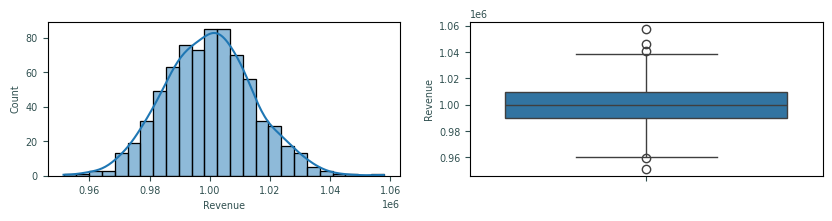

In [155]:
plot_distribution(df, "Revenue")

###### Ex. Handling outliers - 
Create a function which returns a dataframe after removing outliers, mention a parameter as technique = IQR/Zscore

In [160]:
def outliers_IQR(df, col) :
      if isinstance(col, str) and is_present(df, col) :
          Q1 = np.percentile(df[col], 25)
          Q3 = np.percentile(df[col], 75)
          IQR = Q3 - Q1
          min_w = Q1 - 1.5 * IQR
          max_w = Q3 + 1.5 * IQR
          return df.loc[df[col].between(min_w, max_w)]

In [176]:
import scipy.stats as stat
def outliers_zscores(df, col) :
    """
    Removes outliers from a numeric column in a Dataframe using Z-score technique
    
    Parameters:
    df : Input DataFrame
    col(str) : Column name to evaluate outliers

    Returns:
    pd.DataFrame: Filtered DataFrame with outliers(Z > 3) remove    
    """
    if isinstance(col, str) and is_present(df, col) :
          zscore_arr = np.abs(stat.zscore(df[col]))
          return df.loc[zscore_arr <= 3]

In [177]:
result = outliers_zscores(df, "Revenue")
result.shape

(728, 4)

In [178]:
help(outliers_zscores)

Help on function outliers_zscores in module __main__:

outliers_zscores(df, col)
    Removes outliers from a numeric column in a Dataframe using Z-score technique

    Parameters:
    df : Input DataFrame
    col(str) : Column name to evaluate outliers

    Returns:
    pd.DataFrame: Filtered DataFrame with outliers(Z > 3) remove



###### Ex. Aggregate by Period - 
Define a function that accepts the following parameters: `df`, `date_col`, `metric`, `Period` (defaulting to 'Y', 'Q', or 'M'), and `aggregation`, and returns a DataFrame with the metric aggregated over the specified period.

In [179]:
df.head()

,Date,Revenue,Sales,Stock Price
0,2023-06-09,1007450.71,58406.47,5853.68
1,2023-06-10,997926.04,64990.70,5404.64
2,2023-06-11,1009715.33,82831.01,5593.63
3,2023-06-12,1022845.45,66873.38,6412.00
4,2023-06-13,996487.70,92532.67,7168.93


In [198]:
def agg_by_period(df, date_col, metric_col, period = "M", agg = "mean") :
    result = df[[date_col, metric_col]].copy()  # Creating a copy of the dataframe
    result["Period"] = df[date_col].dt.to_period(period).dt.to_timestamp()
    return result.groupby("Period")[metric_col].agg(agg).round(2)
agg_by_period(df, "Date", "Sales", "Q")

Period
2023-04-01    67404.70
2023-07-01    79051.11
2023-10-01    83473.74
2024-01-01    82717.21
2024-04-01    78647.07
2024-07-01    81774.18
2024-10-01    79871.79
2025-01-01    75945.61
2025-04-01    81943.89
Name: Sales, dtype: float64

###### Ex. Rolling Average Calculation - 

Write a Python function `calculate_rolling_average(df, date_col, metric_col, window=7)` that converts `date_col` to datetime, sorts by it, and adds a new column `<metric_col>_rolling_<window>d` with the rolling average over the specified window. Return the DataFrame with the original and new column.


###### Ex. Percent change calculation - 
Write a function `calculate_pct_change(df, date_col, metric_col)` that converts `date_col` to datetime, sorts the DataFrame, and calculates the percentage change in `metric_col`. It adds the result as a new column `<metric_col>_pct_change` and returns the updated DataFrame.


###### Ex. Filter for N days - 

Create a function `filter_last_n_days(df, date_col, n_days)` that converts `date_col` to datetime and filters the DataFrame to include only rows from the last `n_days` based on the current date. Returns the filtered DataFrame.
